###  [前準備①] MeCabサーバーは事前に起動させておくこと
https://github.com/abeja-inc/Platform_handson/tree/master/mecab_api

### [前準備②]下記リンクからデータをダウンロードして、展開ファイルを特定のチャンネルに配置しておくこと
https://drive.google.com/file/d/1qAQkntJqauXt3lL_8jXUiUJXeDA0qFgY/view?usp=sharing
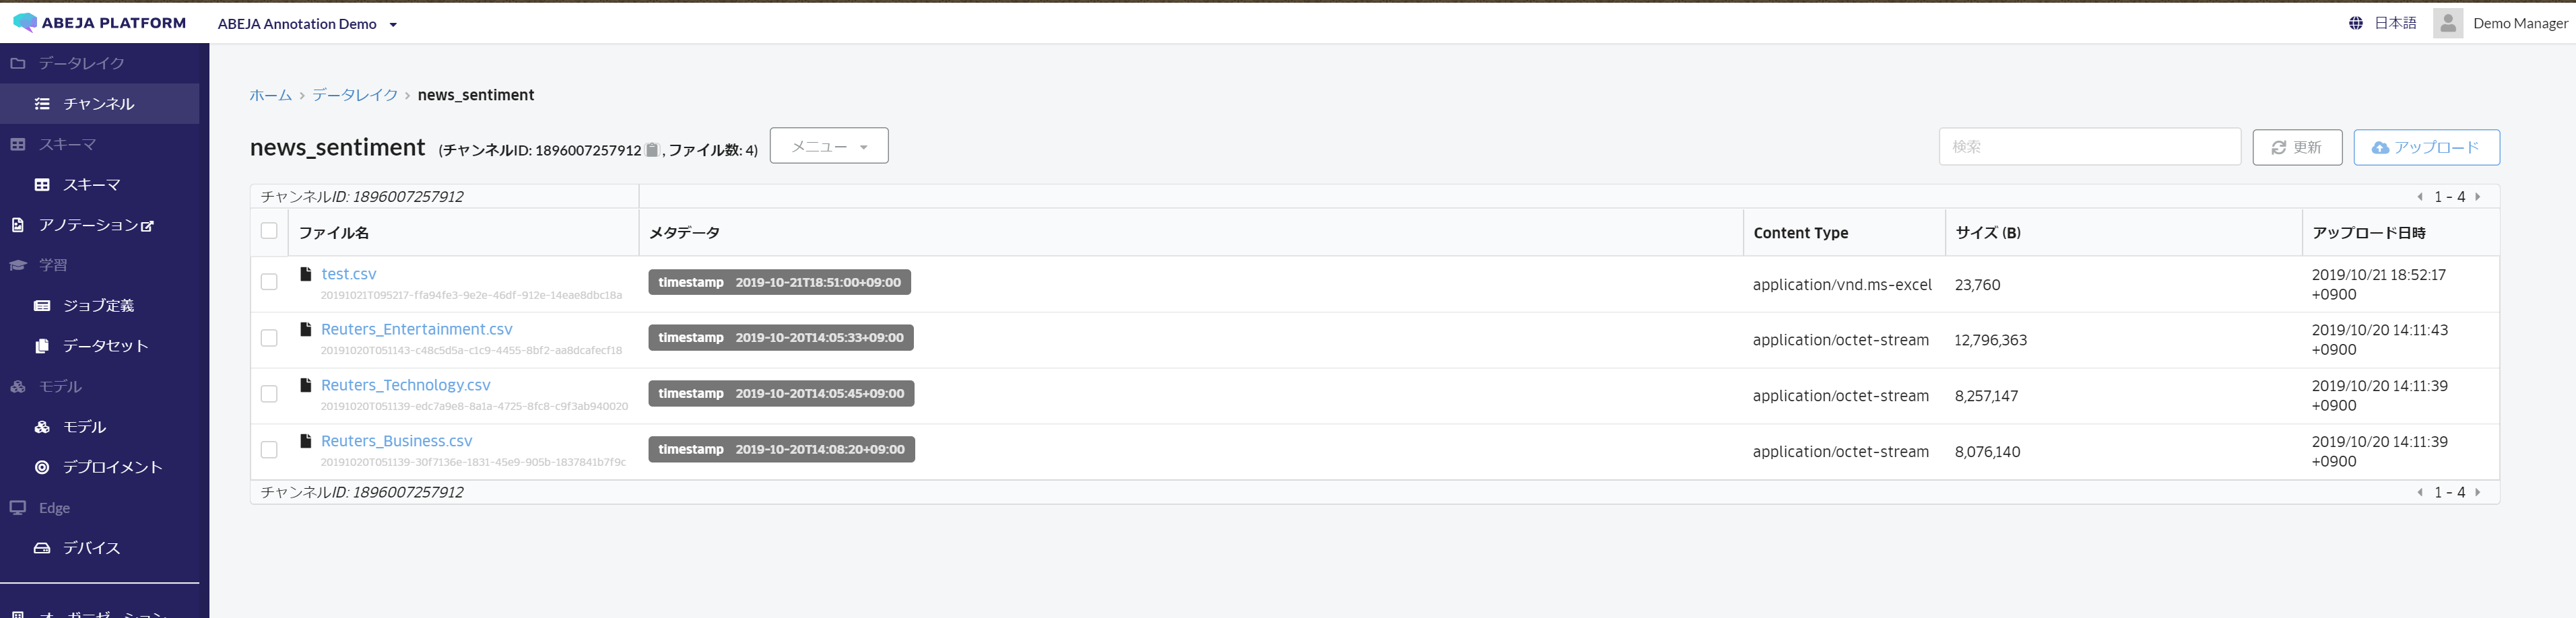

## ニュースデータを使って分類の実施
- 3クラス分類（エンターテイメント、テクノロジー、ビジネス）
- 学習用のファイルまで実施（前処理）し、テンプレートを使った学習まで実施する

In [1]:
# Pandasの設定
import pandas as pd

In [26]:
# クレデンシャルの設定
credential = {
    'user_id':"XXXXXXXXXXXXX",
    'personal_access_token':"XXXXXXXXXXXXXXXX"
}

In [27]:
'''
データレイクからデータをダウンロードする場合
（時間が少しかかる）
'''

from abeja.datalake import Client as DatalakeClient
from abeja.datalake import APIClient as APIDatalakeClient

import requests

organization_id = "XXXXXXXXXXXXX"
channel_id = "XXXXXXXXXXXXXX"

# datalakeの設定
datalake_client = DatalakeClient(organization_id=organization_id, credential=credential)
channel = datalake_client.get_channel(channel_id)

# データレイクの設定
sentence_dic = {}
for file in channel.list_files():
    filename = file.metadata['filename'].replace(".csv","")
    if file.content_type == "application/octet-stream" and filename.startswith("Reuters"): #application/octet-streamだけ処理を実施
        filename = file.metadata['filename'].replace(".csv","")
        get_url_info = requests.get(file.download_url).text
        sentence_dic[filename] = get_url_info

In [28]:
# データの分割(改行のコードで分割)
for key, value in sentence_dic.items():
    sentence_dic[key] = value.split("\n")

In [29]:
#　各カテゴリの格納状態を確認(Entertainment)
print(len(sentence_dic["Reuters_Entertainment"]))
print(sentence_dic["Reuters_Entertainment"][0])

10993
［ロサンゼルス　１７日　ロイター］ - 米ロサンゼルスで１５日、ナチス・ドイツを率いた独裁者アドルフ・ヒトラーを風刺した新作コメディー「ジョジョ・ラビット」のプレミア上映会が開かれ、ニュージーランド出身のタイカ・ワイティティ監督らが出席した。会場にはキャストのスカーレット・ヨハンソン、サム・ロックウェル、レベル・ウィルソン、ローマン・グリフィン・デイビス、トーマシン・マッケンジーらも姿を見せた。「ジョジョ・ラビット」は第２次大戦末期のドイツを舞台とし、ヒトラーが空想上の友だちという１０歳の少年ジョジョが主人公。ある日、母親が屋根裏にユダヤ人の少女をかくまっていることを知り、世界が変わっていくというストーリー。９月にはトロント映画祭で最高賞に当たる観客賞を受賞した。同賞に選ばれた作品の多くは米アカデミー賞の作品賞を獲得するケースが多く、「ジョジョ・ラビット」もオスカーへの期待が高まっている。全米公開は１８日から。日本では２０２０年１月１７日に封切られる。ワイティティ監督は脚本も担当し、ヒトラー役も演じた。チャレンジが好きだと話し、今作はこれまでで最もリスクが高いと同時に最も成功した作品かもしれないと述べた。母親がユダヤ系で父親がマオリの同監督は「大人がひどいことをするのを子どもが目にするというアイデアにとてもひかれた」とコメント。「子どもたちに寛容性の大切さについて教え、この世界に憎悪が存在する場所はないことを常に自分たちに思い起こさせなければならない」と語った。私たちの行動規範：トムソン・ロイター「信頼の原則」


In [30]:
#　各カテゴリの格納状態を確認(Technology)
print(len(sentence_dic["Reuters_Technology"]))
print(sentence_dic["Reuters_Technology"][0])

4391
［北京　１８日　ロイター］ - 中国の国家市場監督管理総局は１８日、肖亜慶局長が米アップル(AAPL.O)のティム・クック最高経営責任者（ＣＥＯ）と１７日に北京で面会したと明らかにした。ウェブサイトに掲載された声明によると、両氏はアップルの中国向け投資の拡大や消費者の権利保護、企業の社会的責任について協議したという。これ以上の詳細は明らかになっていない。私たちの行動規範：トムソン・ロイター「信頼の原則」


In [31]:
#　各カテゴリの格納状態を確認(Business)
print(len(sentence_dic["Reuters_Business"]))
print(sentence_dic["Reuters_Business"][0])

3609
［東京　９日　ロイター］ - 三菱自動車(7211.T)は９日、アシュワニ・グプタ最高執行責任者（ＣＯＯ）が来年１月１日付で日産自動車(7201.T)のＣＯＯに就任する予定だと発表した。日産が発表したトップ人事を受け、グプタ氏の日産ＣＯＯ就任を受諾した。三菱自としての経営体制は「今後検討していく」としている。三菱自の益子修会長とグプタＣＯＯは同日、東京都内で記者団の取材に応じた。益子会長は今回の人事について、８日の日産取締役会終了後に同社から連絡があったことを明らかにし、グプタ氏が「どうしても必要という話があり、苦渋の決断だったが、日産に出さざるを得ない」と述べた。その上で「日産の一日も早い復活はアライアンスを組む三菱自にとってもプラス」と話した。グプタ氏の後任については「昨日の今日で何もまったく考えていない。具体的なアイデアが本日のところあるわけではない」と語った。グプタ氏は「日産、ルノー、三菱自の３社連合や多文化でのビジネスの経験をこれから生かしたい」との意向を示した。日産の専務執行役員で次期社長となる内田誠氏、次期副ＣＯＯの関潤氏とは「約１０年前に一緒に仕事をした経験がある。３人の力を活かし、どういうふうに（日産の業績を立て直すか）やっていくか議論していきたい」と述べた。＊内容を追加しました。白木真紀私たちの行動規範：トムソン・ロイター「信頼の原則」


In [32]:
# json形式に変更するために、リストからdicに持ち方を変更
Entertainment_dic = {}
num = 1
for x in sentence_dic["Reuters_Entertainment"]:
    Entertainment_dic[str(num)] = x
    num += 1

In [33]:
# json形式に変更するために、リストからdicに持ち方を変更
Technology_dic = {}
num = 1
for x in sentence_dic["Reuters_Technology"]:
    Technology_dic[str(num)] = x
    num += 1

In [34]:
# json形式に変更するために、リストからdicに持ち方を変更
Business_dic = {}
num = 1
for x in sentence_dic["Reuters_Business"]:
    Business_dic[str(num)] = x
    num += 1

In [35]:
# dicをjsonに変更
import json
Entertainment_json = json.dumps(Entertainment_dic, ensure_ascii=False).encode('utf-8')
Technology_json = json.dumps(Technology_dic, ensure_ascii=False).encode('utf-8')
Business_json = json.dumps(Business_dic, ensure_ascii=False).encode('utf-8')

sentence_dic = {}
sentence_dic["Entertainment"] = Entertainment_json
sentence_dic["Technology"] = Technology_json
sentence_dic["Business"] = Business_json

In [43]:
import requests

# クレデンシャルの設定
# MeCabサーバの情報を設定しておく
mecab_url = "XXXXXXXXXXXXXXXXXXXXXXX"    #接続先のURL
user_id = "XXXXXXXX"    #ユーザーID
personal_access_token = "XXXXXXXXXXXXXX"   #アクセストークン

# Mecabの実行
mb_result_dic = {}
auth = (user_id,personal_access_token)
for key, value in sentence_dic.items():
    mb_result_dic[key] = requests.post(mecab_url, value, headers={'Content-Type': 'application/json; charset=UTF-8'}, auth=auth)

In [44]:
# 文の終了がEOSであることを確認する
mb_result_dic["Business"].json()[1:10000]

'\t記号,括弧開,*,*,*,*,［,［,［\n東京\t名詞,固有名詞,地域,一般,*,*,東京,トウキョウ,トーキョー\n\u3000\t記号,空白,*,*,*,*,\u3000,\u3000,\u3000\n９\t名詞,数,*,*,*,*,９,キュウ,キュー\n日\t名詞,接尾,助数詞,*,*,*,日,ニチ,ニチ\n\u3000\t記号,空白,*,*,*,*,\u3000,\u3000,\u3000\nロイター\t名詞,固有名詞,組織,*,*,*,ロイター,ロイター,ロイター\n］\t記号,括弧閉,*,*,*,*,］,］,］\n-\t記号,一般,*,*,*,*,*\n三菱自動車\t名詞,固有名詞,組織,*,*,*,三菱自動車,ミツビシジドウシャ,ミツビシジドーシャ\n(\t記号,一般,*,*,*,*,*\n7211\t名詞,数,*,*,*,*,*\n.\t記号,一般,*,*,*,*,*\nT\t名詞,固有名詞,組織,*,*,*,*\n)\t記号,一般,*,*,*,*,*\nは\t助詞,係助詞,*,*,*,*,は,ハ,ワ\n９\t名詞,数,*,*,*,*,９,キュウ,キュー\n日\t名詞,接尾,助数詞,*,*,*,日,ニチ,ニチ\n、\t記号,読点,*,*,*,*,、,、,、\nアシュワニ・グプタ\t名詞,一般,*,*,*,*,*\n最高執行責任者\t名詞,固有名詞,一般,*,*,*,最高執行責任者,サイコウシッコウセキニンシャ,サイコーシッコーセキニンシャ\n（\t記号,括弧開,*,*,*,*,（,（,（\nＣＯＯ\t名詞,固有名詞,組織,*,*,*,*\n）\t記号,括弧閉,*,*,*,*,）,）,）\nが\t助詞,格助詞,一般,*,*,*,が,ガ,ガ\n来年\t名詞,副詞可能,*,*,*,*,来年,ライネン,ライネン\n１\t名詞,数,*,*,*,*,１,イチ,イチ\n月\t名詞,一般,*,*,*,*,月,ツキ,ツキ\n１\t名詞,数,*,*,*,*,１,イチ,イチ\n日\t名詞,接尾,助数詞,*,*,*,日,ニチ,ニチ\n付\t名詞,接尾,一般,*,*,*,付,ヅケ,ズケ\nで\t助詞,格助詞,一般,*,*,*,で,デ,デ\n日産自動車\t名詞,固有名詞,組織,*,*,*,日産自動車,ニッサンジドウシャ,ニッサンジドーシャ\n(\t記号,一般,*,*,*

In [45]:
# EOSで分割し、再挿入
for key, value in mb_result_dic.items():
    mb_result_dic[key] = value.json().split("EOS")

In [46]:
mb_result_dic["Business"][0]

'［\t記号,括弧開,*,*,*,*,［,［,［\n東京\t名詞,固有名詞,地域,一般,*,*,東京,トウキョウ,トーキョー\n\u3000\t記号,空白,*,*,*,*,\u3000,\u3000,\u3000\n９\t名詞,数,*,*,*,*,９,キュウ,キュー\n日\t名詞,接尾,助数詞,*,*,*,日,ニチ,ニチ\n\u3000\t記号,空白,*,*,*,*,\u3000,\u3000,\u3000\nロイター\t名詞,固有名詞,組織,*,*,*,ロイター,ロイター,ロイター\n］\t記号,括弧閉,*,*,*,*,］,］,］\n-\t記号,一般,*,*,*,*,*\n三菱自動車\t名詞,固有名詞,組織,*,*,*,三菱自動車,ミツビシジドウシャ,ミツビシジドーシャ\n(\t記号,一般,*,*,*,*,*\n7211\t名詞,数,*,*,*,*,*\n.\t記号,一般,*,*,*,*,*\nT\t名詞,固有名詞,組織,*,*,*,*\n)\t記号,一般,*,*,*,*,*\nは\t助詞,係助詞,*,*,*,*,は,ハ,ワ\n９\t名詞,数,*,*,*,*,９,キュウ,キュー\n日\t名詞,接尾,助数詞,*,*,*,日,ニチ,ニチ\n、\t記号,読点,*,*,*,*,、,、,、\nアシュワニ・グプタ\t名詞,一般,*,*,*,*,*\n最高執行責任者\t名詞,固有名詞,一般,*,*,*,最高執行責任者,サイコウシッコウセキニンシャ,サイコーシッコーセキニンシャ\n（\t記号,括弧開,*,*,*,*,（,（,（\nＣＯＯ\t名詞,固有名詞,組織,*,*,*,*\n）\t記号,括弧閉,*,*,*,*,）,）,）\nが\t助詞,格助詞,一般,*,*,*,が,ガ,ガ\n来年\t名詞,副詞可能,*,*,*,*,来年,ライネン,ライネン\n１\t名詞,数,*,*,*,*,１,イチ,イチ\n月\t名詞,一般,*,*,*,*,月,ツキ,ツキ\n１\t名詞,数,*,*,*,*,１,イチ,イチ\n日\t名詞,接尾,助数詞,*,*,*,日,ニチ,ニチ\n付\t名詞,接尾,一般,*,*,*,付,ヅケ,ズケ\nで\t助詞,格助詞,一般,*,*,*,で,デ,デ\n日産自動車\t名詞,固有名詞,組織,*,*,*,日産自動車,ニッサンジドウシャ,ニッサンジドーシャ\n(\t記号,一般,*,*,

### ベクタライズについては、CountVectorizer, TfidfVectorizerなど簡単にできるライブラリが存在する
- 今回はレクチャーのためロジックを記載しているが、ソースに間違いも発生するため、本来であればライブラリを使うことが好ましい
- gensimライブラリを使用した場合の簡単な方法こちらを参考にしてください。  
https://github.com/abeja-inc/Platform_handson/blob/master/livedoor_classify/notebook/livedoor_data.ipynb

In [47]:
#　簡易stopwordの設定
# 既に定義されていstopwordを使用する
import urllib.request, urllib.error
slothlib_path = 'http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt'
slothlib_file = html = urllib.request.urlopen(slothlib_path)
slothlib_stopwords = [line.decode("utf-8").strip() for line in slothlib_file]
slothlib_stopwords = [ss for ss in slothlib_stopwords if not ss==u'']

In [48]:
'''
すべての単語の辞書(出現回数)を作る
MeCabから出力された形は下記のような形になる

ロサンゼルス	名詞,固有名詞,地域,一般,*,*,ロサンゼルス,ロサンゼルス,ロサンゼルス

'''

import re

# 辞書の定義
doc_word_dic = {}
doc_wordsum_dic = {}
doc_num = 1
word_docnum_dic = {}
word_list = []
label = {}

# 正規表現
pattern1 = '^[0-9０-９]*$'
pattern2 = '^[a-z]$'
pattern3 = '^[A-Z]*$'

for key, value in mb_result_dic.items():
    for x in value:
        word = x.split("\n")     # 単語レベルまで分割
        doc_word_dic[doc_num] = {}    #　ドキュメントごとの単語出現回数
        for x in word:
            word_detail = x.split(",")
            meta = word_detail[0].split("\t")
            if len(meta) < 2:   # 空白行の対策
                pass
            elif word_detail[6] in slothlib_stopwords:    #stopwordの除外
                pass
            elif re.match(pattern1, word_detail[6]):   #数字の羅列などを削除する
                pass
            elif re.match(pattern2, word_detail[6]):
                pass
            elif re.match(pattern3, word_detail[6]):
                pass
            elif meta[1] in ("名詞"): #, "副詞", "形容詞", "動詞"):
                
                # document内に、ある単語が出現する回数を設定する処理
                if word_detail[6] in doc_word_dic[doc_num]:
                    doc_word_dic[doc_num][word_detail[6]] += 1
                else:
                    doc_word_dic[doc_num][word_detail[6]] = 1
                    
                # documentに登場する単語総数を設定する処理
                if doc_num in doc_wordsum_dic:
                    doc_wordsum_dic[doc_num] += 1
                else:
                    doc_wordsum_dic[doc_num] = 1
                
                # ある単語が登場したドキュメントの数
                if word_detail[6] in word_docnum_dic:
                    if doc_num in word_docnum_dic[word_detail[6]]:
                        pass
                    else:
                        word_docnum_dic[word_detail[6]][doc_num] = 1
                else:
                    word_docnum_dic[word_detail[6]] = {}
                    word_docnum_dic[word_detail[6]][doc_num] = 1
                    
                # wordの辞書を作成
                word_list.append(word_detail[6])
                
        # 正解ラベルの設定
        if len(doc_word_dic[doc_num]) > 0:
            if key == "Entertainment":
                label[doc_num] = 0
            elif key == "Technology":
                label[doc_num] = 1
            elif key == "Business":
                label[doc_num] = 2
            doc_num += 1

In [49]:
#ワードリストの重複語削除
word_list = list(set(word_list))

In [50]:
#　単語の各文書内での出現回数を取得する(特定の文書内に複数回登場しても回数は1回)
wordnum_dic = {}
for key, value in word_docnum_dic.items():
    wordnum_dic[key] = len(value)
wordnum_dic = sorted(wordnum_dic.items(), key=lambda x:x[1], reverse=True)

In [51]:
# 出現回数上位1000個
wordnum_dic[0:1000]

[('私たち', 18990),
 ('行動', 18990),
 ('規範', 18990),
 ('トムソン・ロイター', 18990),
 ('信頼の原則', 18990),
 ('ロイター', 18885),
 ('*', 18743),
 ('した', 16872),
 ('さ', 11331),
 ('米', 10872),
 ('発表', 6848),
 ('い', 6506),
 ('ら', 6183),
 ('ドル', 5471),
 ('てい', 5135),
 ('氏', 5009),
 ('明らか', 4953),
 ('述', 4870),
 ('ロサンゼルス', 4529),
 ('べた', 4222),
 ('の', 3738),
 ('受け', 3639),
 ('映画', 3502),
 ('示し', 3365),
 ('米国', 3299),
 ('．', 3229),
 ('可能性', 2934),
 ('おり', 2917),
 ('指摘', 2907),
 ('語', 2760),
 ('大手', 2719),
 ('公開', 2613),
 ('向け', 2600),
 ('予定', 2573),
 ('東京', 2564),
 ('ニューヨーク', 2559),
 ('同社', 2526),
 ('歌手', 2494),
 ('コメント', 2469),
 ('今年', 2422),
 ('英', 2320),
 ('人気', 2305),
 ('いない', 2302),
 ('作品', 2293),
 ('昨年', 2268),
 ('予想', 2261),
 ('市場', 2253),
 ('われ', 2172),
 ('中国', 2147),
 ('俳優', 2131),
 ('原題', 2101),
 ('見通し', 2061),
 ('ロンドン', 2032),
 ('したこと', 2014),
 ('説明', 2006),
 ('追加', 2003),
 ('企業', 1994),
 ('内容', 1973),
 ('問題', 1961),
 ('日本', 1933),
 ('必要', 1916),
 ('影響', 1858),
 ('め', 1789),
 ('世界', 1781),
 ('出', 1780

In [52]:
# 出現回数下位20000個
wordnum_dic[len(wordnum_dic)-20000:len(wordnum_dic)]

[('モデレーター', 2),
 ('商業地区', 2),
 ('公民権法', 2),
 ('ガゼット', 2),
 ('活字', 2),
 ('危険準備金', 2),
 ('火災保険', 2),
 ('繰り入れ', 2),
 ('藤田裕', 2),
 ('ラリー・エリソン', 2),
 ('ワイヤレススピーカー', 2),
 ('顧客満足度', 2),
 ('随一', 2),
 ('複利', 2),
 ('忍び', 2),
 ('記録媒体', 2),
 ('自転車シェアリング', 2),
 ('東芝デジタルソリューションズ', 2),
 ('業務効率化', 2),
 ('スカイアクティブ', 2),
 ('日本名', 2),
 ('アクセラ', 2),
 ('丸本明', 2),
 ('丸本', 2),
 ('燃焼', 2),
 ('閑古鳥', 2),
 ('チェンナイ', 2),
 ('外国組織', 2),
 ('付託', 2),
 ('tae', 2),
 ('バーナーズ', 2),
 ('増殖', 2),
 ('ルービン', 2),
 ('引け時', 2),
 ('セッションズ', 2),
 ('中国大使館', 2),
 ('幻滅', 2),
 ('高橋社長', 2),
 ('税収減', 2),
 ('車輪', 2),
 ('周二', 2),
 ('桂山', 2),
 ('哲夫', 2),
 ('材料費', 2),
 ('身構え', 2),
 ('あらわれ', 2),
 ('柳井正', 2),
 ('大西洋評議会', 2),
 ('科学捜査研究所', 2),
 ('削除対象', 2),
 ('在米', 2),
 ('情報機器', 2),
 ('知るべ', 2),
 ('リクルーター', 2),
 ('雑草', 2),
 ('蒸気機関', 2),
 ('企業サイト', 2),
 ('インフォメーション', 2),
 ('アクシス', 2),
 ('不換紙幣', 2),
 ('秋季', 2),
 ('ロスカット', 2),
 ('軍事作戦', 2),
 ('ロードアイランド', 2),
 ('諸問題', 2),
 ('サイモン・シガース', 2),
 ('有料化', 2),
 ('リヒテンシュタイン', 2),
 ('うまみ', 2),
 ('所存', 2),
 

In [53]:
# 出現回数が8%以上のものと、出現回数が1回しかないものをword_listの削除対象とする
for key, value in wordnum_dic:
    if value/doc_num > 0.08 or value == 1:
        word_list.remove(key)

In [55]:
import math

# 書き出し用のファイルの作成
f = open("train_all.csv", "w")

# labelの書き出し
header = "label1"
for x in range(len(word_list)):
    header = header + "," + "label" + str(x+2)
f.write(header + "\n")

num = 1
while num < doc_num:
    if num not in doc_wordsum_dic:
        pass
    else:
        text = ""
        for word in word_list:
            if word in doc_word_dic[num]:
                socre = doc_word_dic[num][word] / doc_wordsum_dic[num] * (math.log(doc_num / len(word_docnum_dic[word])) + 1)
            else:
                socre = 0
            text = text + "," + str(socre)
        f.write(str(label[num]) + text + "\n")
    num += 1
f.close()

In [56]:
# 出力された各辞書データを念のため吐き出しておく
import json
import pickle

with open("doc_word_dic.json", 'w') as f1:
    json.dump(doc_word_dic, f1)
with open("doc_wordsum_dic.json", 'w') as f2:
    json.dump(doc_wordsum_dic, f2)
with open("word_docnum_dic.json", 'w') as f3:
    json.dump(word_docnum_dic, f3)
with open("word_list.pkl", 'wb') as f4:
    pickle.dump(word_list, f4)

### 出力されたtrain_all.csvをチャンネルにアップロードする
- 学習の前処理が完了し、学習できる状態になった
- データのサイズが約1.4GBほどになっており、ストップワードをもう少し設定することも考えるべき
- このデータを`abeja datalake upload`コマンドを使い、特定のチャンネルにアップロードする
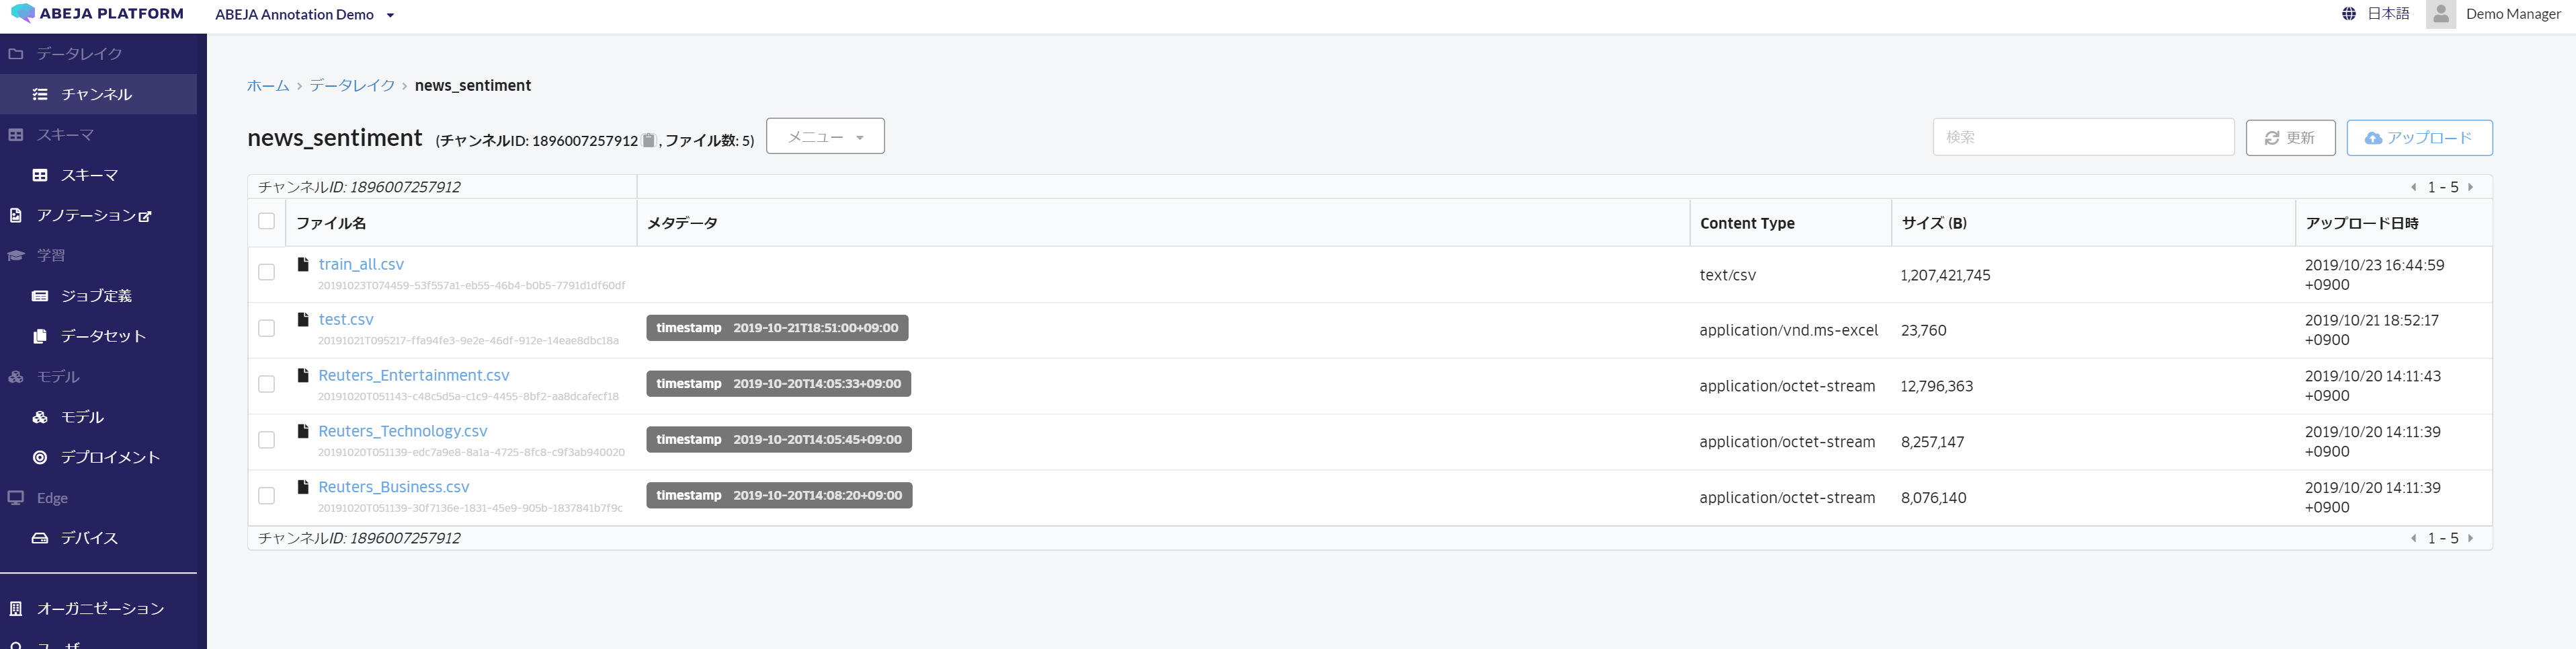

### 学習ジョブで回した結果
- 7時間くらいかかる(CVにもよる)
- メモリが小さいとメモリリークするので、LightGBM(GPU)で処理を実施する
- この学習結果を使って、デプロイサーバーまで構築する
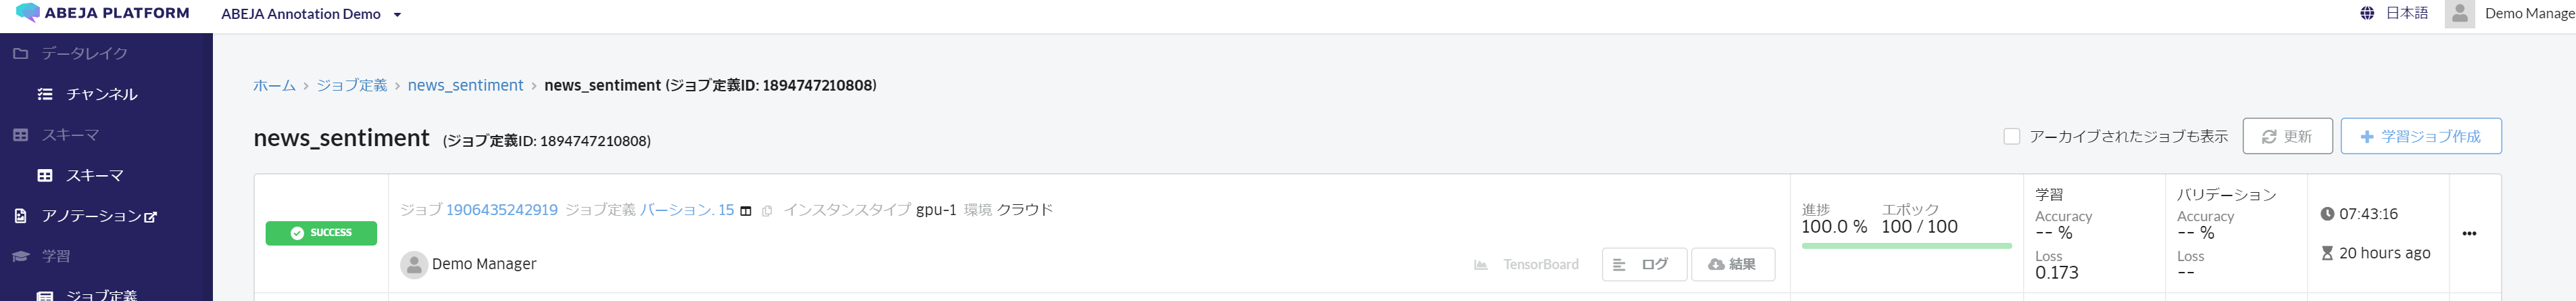